<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

<h3>ТЕСТЫ

In [9]:
def test1():
    matrix = [np.array([[1, 2], [3, 4]])]
    vector = [np.array([[1], [1]])]
    exp_result = np.array([[3], [7]])

    assert np.array_equal(sum_prod(matrix, vector), exp_result), "Тест не пройден"
    print("Тест 1 пройден")
    


def test2():
    matrix = [np.array([[2, 0], [0, 2]])]
    vector = [np.array([[1], [1]])]
    exp_result = np.array([[2], [2]])

    assert np.array_equal(sum_prod(matrix, vector), exp_result), "Тест не пройден"
    print("Тест 2 пройден")


test1()
test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
def binarize(M, threshold=0.5):
    # Your code goes here
    return np.where(M > threshold, 1, 0)

<h3>ТЕСТЫ

In [12]:
def binarize_test1():
    M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    exp_result = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]])

    assert np.array_equal(binarize(M, 5), exp_result), "Тест 1 не пройден"
    print("Тест 1 пройден")

def binarize_test2():
    M = np.array([[ 1,  0,  3], [-1,  5,  2], [ 4,  0, -2]])
    exp_result = np.array([[1, 0, 1], [0, 1, 1], [1, 0, 0]])

    assert np.array_equal(binarize(M), exp_result), "Тест 2 не пройден"
    print("Тест 2 пройден")

binarize_test1()
binarize_test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [13]:
def unique_rows(mat):
    unique = [np.unique(row) for row in mat]
    return unique

def unique_columns(mat):
    unique = [np.unique(row) for row in mat.T]
    return unique

<h3>ТЕСТЫ

In [14]:
def unique_test():
    mat = np.array([[1, 2, 2], [3, 3, 3], [4, 5, 6]])
    exp_rows = [np.array([1, 2]), np.array([3]), np.array([4, 5, 6])]

    assert all(np.array_equal(u, v) for u, v in zip(unique_rows(mat), exp_rows)), "Тест уникальных строк не пройден"
    print("Тест строк пройден")

    exp_cols = [np.array([1, 3, 4]), np.array([2, 3, 5]), np.array([2, 3, 6])]
    assert all(np.array_equal(u, v) for u, v in zip(unique_columns(mat), exp_cols)), "Тест уникальных столбцов не пройден"
    print("Тест столбцов пройден")

unique_test()

Тест строк пройден
Тест столбцов пройден


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

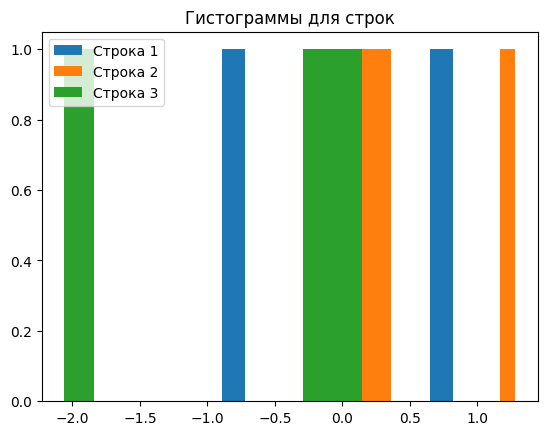

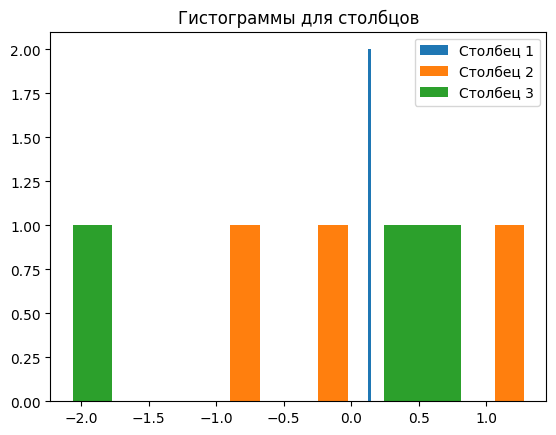

Матрица:
[[-0.09543405 -0.89390755  0.81582676]
 [ 0.13427399  1.27914111  0.31628439]
 [ 0.14842904 -0.17696735 -2.05960805]]
Мат ожидания строк: [-0.05783828  0.57656649 -0.69604878]
Мат ожидания столбцов: [ 0.06242299  0.06942207 -0.30916563]
Дисперии строк: [0.48790529 0.25232684 0.94729407]
Дисперсии столбцов: [0.01249282 0.81737728 1.57361475]


In [3]:
def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    row_mat_expectation = np.mean(matrix, axis=1)
    column_mat_expectation = np.mean(matrix, axis=0)
    row_dispersion = np.var(matrix, axis=1)
    column_dispersion = np.var(matrix, axis=0)

    for i in range(m):
        plt.hist(matrix[i], label=f"Строка {i + 1}")
    plt.title('Гистограммы для строк')
    plt.legend()
    plt.show()

    transponsed_matrix = np.transpose(matrix)
    for i in range(n):
        plt.hist(transponsed_matrix[i], label=f"Столбец {i + 1}")
    plt.title('Гистограммы для столбцов')
    plt.legend()
    plt.show()

    return matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion

matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion = fill_matrix(3, 3)

print(f"Матрица:\n{matrix}")
print(f"Мат ожидания строк: {row_mat_expectation}")
print(f"Мат ожидания столбцов: {column_mat_expectation}")
print(f"Дисперии строк: {row_dispersion}")
print(f"Дисперсии столбцов: {column_dispersion}")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    """a - 'чёрные поля', b - 'белые поля'"""

    mat = np.zeros((m, n), dtype=int)

    mat[::2, ::2] = a
    mat[1::2, 1::2] = a
    mat[::2, 1::2] = b
    mat[1::2, ::2] = b
    
    return mat

    

<h3> ТЕСТЫ

In [16]:
def chess_test():
    a, b = 0, 1

    m1, n1 = 2, 3
    expected1 = np.array([[0, 1, 0], [1, 0, 1]])
    assert np.array_equal(chess(m1, n1, a, b), expected1), "Тест 1 не пройден"
    print("Тест 1 пройден")

    m2, n2 = 3, 3
    expected2 = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
    assert np.array_equal(chess(m2, n2, a, b), expected2), "Тест 2 не пройден"
    print("Тест 2 пройден")

chess_test()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [4]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((n, m, 3), dtype=np.uint8)
    img[:] = background_color

    x0, y0 = (m - a) // 2, (n - b) // 2

    img[y0:y0+b, x0:x0+a] = rectangle_color

    plt.imshow(img)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.zeros((n, m, 3), dtype=np.uint8)
    img[:] = background_color

    x0, y0 = m // 2, n // 2

    y, x = np.ogrid[:n, :m]
    mask = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1

    img[mask] = ellipse_color

    plt.imshow(img)
    plt.axis('off')
    plt.show()

<h3>ТЕСТЫ

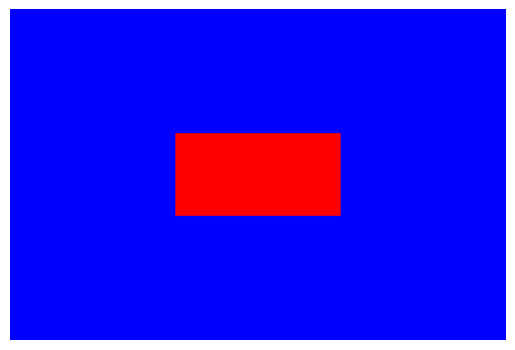

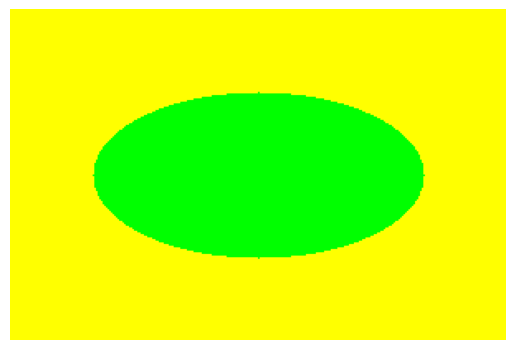

In [5]:
draw_rectangle(100, 50, 300, 200, (255, 0, 0), (0, 0, 255))
draw_ellipse(100, 50, 300, 200, (0, 255, 0), (255, 255, 0))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [6]:
# Your code goes here
def time_series_analysis(time_series, window_size):
    mean = np.mean(time_series)
    
    variance = np.var(time_series)
    
    std_deviation = np.std(time_series)
    
    local_max = []
    local_min = []
    for i in range(1, len(time_series) - 1):
        if time_series[i-1] < time_series[i] and time_series[i] > time_series[i+1]:
            local_max.append(i)
        elif time_series[i-1] > time_series[i] and time_series[i] < time_series[i+1]:
            local_min.append(i)
    
    moving_average = np.convolve(time_series, np.ones(window_size) / window_size, mode='valid')
    
    return {
        'mean': mean,
        'variance': variance,
        'std_deviation': std_deviation,
        'local_max': local_max,
        'local_min': local_min,
        'moving_average': moving_average
    }

<h3>ТЕСТЫ

In [7]:
time_series = [1, 3, 7, 1, 2, 6, 0, 1, 3, 2, 5, 4, 8]
window_size = 3
result = time_series_analysis(time_series, window_size)

print(f"Математическое ожидание: {result['mean']}")
print(f"Дисперсия: {result['variance']}")
print(f"СКО: {result['std_deviation']}")
print("Локальные максимумы: ", [time_series[i] for i in result['local_max']])
print("Локальные минимумы: ", [time_series[i] for i in result['local_min']])
print("Скользящее среднее: ", result['moving_average'])

Математическое ожидание: 3.3076923076923075
Дисперсия: 5.905325443786983
СКО: 2.4300875382971254
Локальные максимумы:  [7, 6, 3, 5]
Локальные минимумы:  [1, 0, 2, 4]
Скользящее среднее:  [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.33333333 2.         3.33333333 3.66666667 5.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [8]:
# Your code goes here
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

<h3>ТЕСТЫ

In [9]:
labels = np.array([0, 2, 3, 0])
one_hot_encoded = one_hot_encoding(labels)
print(one_hot_encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
